In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('./results/calibration_image_data.csv', sep=',',decimal='.')
df.head()

,img_num,target_aruco,img_name,carriage_x_dist,carriage_y_dist,carriage_x_undist,carriage_y_undist,carriage_x_dist_warp,carriage_y_dist_warp,carriage_x_undist_warp,...,target_x_undist_warp,target_y_undist_warp,angle_dist,angle_undist,angle_dist_warp,angle_undist_warp,aruco_flipper_76_x,aruco_flipper_76_y,aruco_flipper_77_x,aruco_flipper_77_y
0,1,13,img_1,544.5,992.5,546.5,978.5,400.31912,562.67110,402.40564,...,1068.4825,534.40424,-45.318967,-45.191352,-45.724640,-45.597591,779.0,1217.5,863.0,1133.5
1,2,13,img_2,766.5,1279.0,771.0,1264.0,628.63520,853.44150,632.79670,...,1068.4825,534.40424,-80.865582,-81.086481,-81.381218,-81.591148,1029.0,1398.0,1050.0,1265.0
2,3,13,img_3,1098.0,1389.0,1101.5,1373.5,965.78076,963.85480,968.40430,...,1068.4825,534.40424,-112.082651,-112.289897,-112.468086,-112.674858,1321.0,1409.0,1265.0,1273.0
3,4,13,img_4,1514.0,1196.5,1514.0,1184.5,1384.80680,766.92880,1383.43700,...,1068.4825,534.40424,-151.987874,-152.006009,-152.130371,-152.173370,1049.0,855.5,741.5,691.5
4,5,13,img_5,1514.5,398.5,1511.5,394.0,1378.65440,-43.00896,1374.41130,...,1068.4825,534.40424,132.190351,132.411126,131.770874,131.992950,741.5,1266.0,848.0,1149.0


In [2]:
x = df[['target_x_undist', 'target_y_undist','angle_undist']]
y = df[['carriage_x_undist','carriage_y_undist']]

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, stratify=df['target_aruco'])

# Linear regressor

In [4]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

In [5]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False),r2_score(y_test,y_pred))

312.70746318294835 0.9004816733672514


Text(0.5, 1.0, 'true vs predicted')

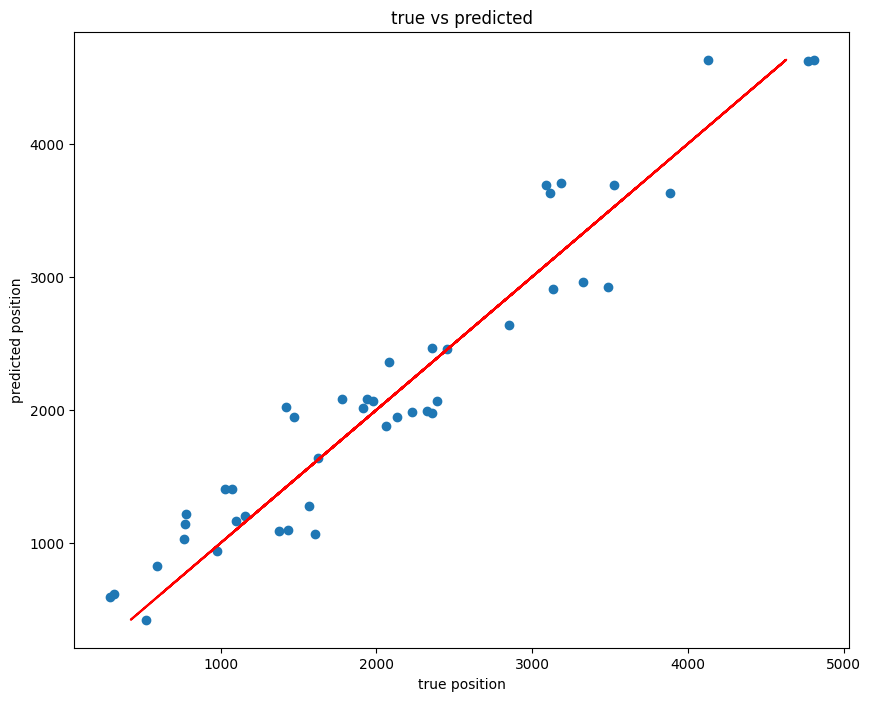

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('true position')
plt.ylabel('predicted position')
plt.title('true vs predicted')

# Quadratic regressor

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly_train=poly.fit_transform(x_train)
x_poly_test=poly.fit_transform(x_test)

model=linear_model.LinearRegression()
model.fit(x_poly_train,y_train)
y_pred=model.predict(x_poly_test)

In [8]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False),r2_score(y_test,y_pred))

175.77509897461678 0.9470450228660225


Text(0.5, 1.0, 'true vs predicted')

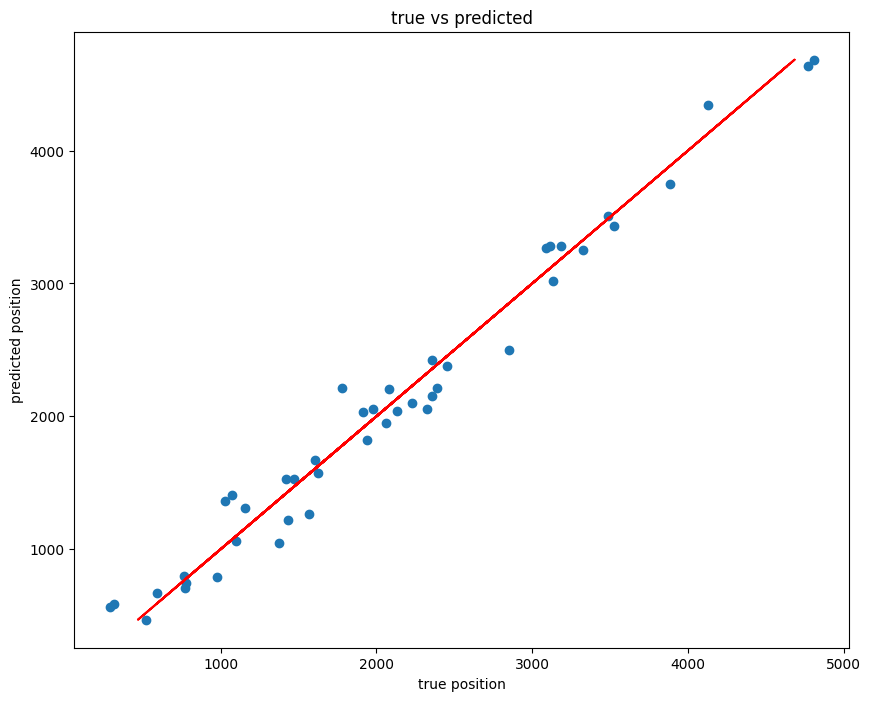

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('true position')
plt.ylabel('predicted position')
plt.title('true vs predicted')

# Cubic regressor

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_poly_train=poly.fit_transform(x_train)
x_poly_test=poly.fit_transform(x_test)

model=linear_model.LinearRegression()
model.fit(x_poly_train,y_train)
y_pred=model.predict(x_poly_test)

In [11]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False),r2_score(y_test,y_pred))

88.16113596726642 0.9926155779348314


Text(0.5, 1.0, 'true vs predicted')

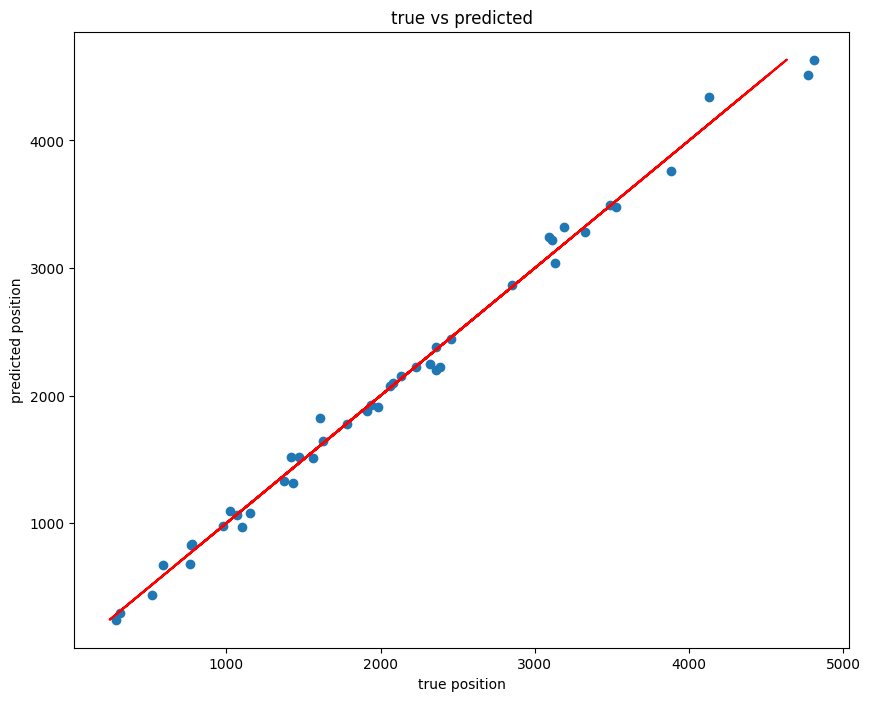

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('true position')
plt.ylabel('predicted position')
plt.title('true vs predicted')

# Random forest

In [13]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False),r2_score(y_test,y_pred))

264.6451161904767 0.9266040384837428


# MLP regressor

In [14]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=100, alpha=0.000005, max_iter=100000,tol=1e-10,solver='adam')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False),r2_score(y_test,y_pred))

211.474155303967 0.9429706787727207


# Analytic calibration

In [15]:
from pool.calibration import CameraCalibration
calib=CameraCalibration()
l_carriage_pred=[]
a=0.910591
b=3.442596
d=1.118040
h=9.291113

for index, row in df.iterrows():

    target=row[['target_x_undist','target_y_undist']].values
    angle=row[['angle_undist']].values[0]
    carriage_pred = calib.predict_carriage_position_in_image_plane(target, angle, (a,b,d,h))
    l_carriage_pred.append(carriage_pred)

y_true=df[['carriage_x_undist','carriage_y_undist']].values
y_pred=np.array(l_carriage_pred)

In [16]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_true,y_pred,squared=False),r2_score(y_true,y_pred))

27.66709569828939 0.9990143788205802


Text(0.5, 1.0, 'true vs predicted')

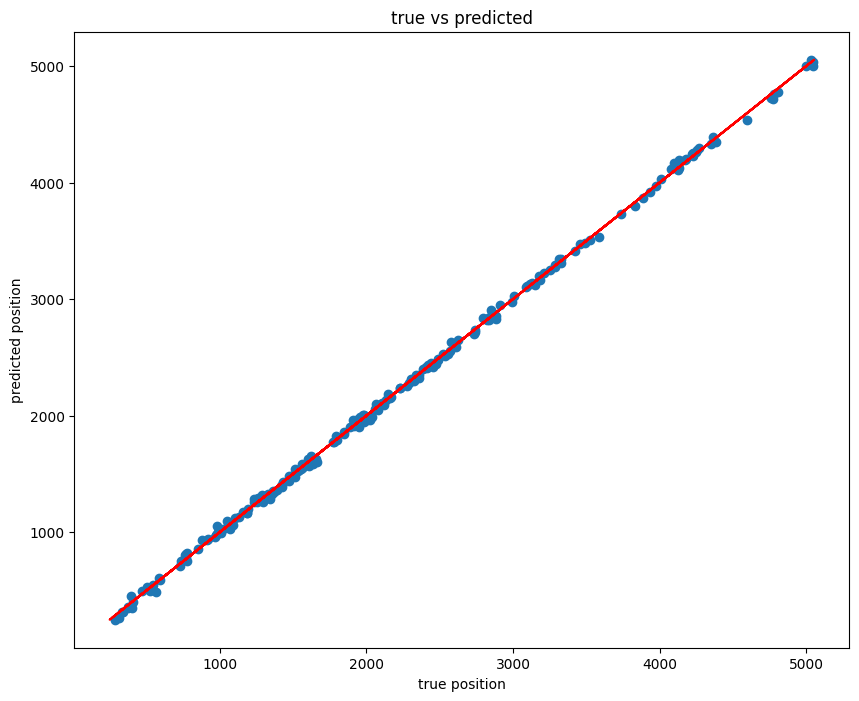

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_true,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('true position')
plt.ylabel('predicted position')
plt.title('true vs predicted')

In [18]:
df_error=pd.DataFrame({'pred_x':y_pred[:,0],
                       'pred_y':y_pred[:,1],
                       'real_x':y_true[:,0],
                       'real_y':y_true[:,1],
                       'target_aruco': df['target_aruco']})
df_error['error_x']=y_pred[:,0]-y_true[:,0]
df_error['error_y']=y_pred[:,1]-y_true[:,1]
df_error['error']=np.sqrt(df_error['error_x'].values**2+df_error['error_y'].values**2)


In [19]:
mean_error=np.mean(df_error['error'])
std_error=np.std(df_error['error'])
rmse=np.sqrt(np.sum(df_error['error']**2)/df_error['error'].shape[0])
print(mean_error, rmse, std_error)

35.31089407074691 39.17771421988923 16.97156596840143


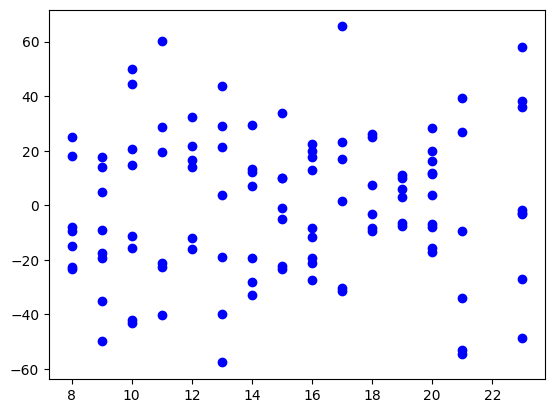

In [20]:
x_axis=df_error['target_aruco']
y_axis=df_error['error_x']
plt.scatter(x_axis,y_axis, color='b')
plt.show()

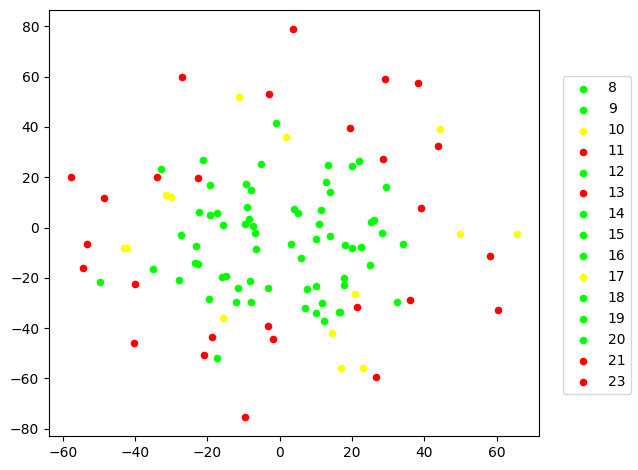

In [27]:
x_axis=df_error['error_x']
y_axis=df_error['error_y']
group = df_error['target_aruco']
#d_colors = {8:'yellow', 9:'orange', 10:'red', 11:'brown', 12:'black', 13:'gray', 14:'green', 15:'blue', 16:'cyan', 17:'purple', 18:'magenta', 19:'lime', 20:'pink', 21:'lavender', 23:'olive'}
#d_colors = {8:'lime', 9:'lime', 10:'lime', 11:'red', 12:'lime', 13:'red', 14:'lime', 15:'lime', 16:'lime', 17:'lime', 18:'lime', 19:'lime', 20:'lime', 21:'red', 23:'red'}
d_colors = {8:'lime', 9:'lime', 10:'yellow', 11:'red', 12:'lime', 13:'red', 14:'lime', 15:'lime', 16:'lime', 17:'yellow', 18:'lime', 19:'lime', 20:'lime', 21:'red', 23:'red'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(df_error['error_x'][df_error['target_aruco']==g], df_error['error_y'][df_error['target_aruco']==g], c = d_colors[g], label = g, s = 20)
fig.legend(loc=7)
fig.tight_layout()
fig.subplots_adjust(right=0.85)
plt.show()

In [296]:
import numpy as np
from scipy.optimize import minimize

cx=5184/2
cy=3456/2

def model(params, X):
    # here you need to implement your real model
    # for Predicted_Installation
    a,b,c,d= params
    l_carriage_pred=[]
    for row in X:
        target=row[:2]
        angle=row[2]
        carriage_pred = calib.predict_carriage_position_in_image_plane(target, angle, (0.910591,3.442596,1.118040,9.291113))
        l_carriage_pred.append(carriage_pred)
    y_pred=np.array(l_carriage_pred)
    far_from_x_center=np.abs(cx-y_pred[:,0])
    far_from_y_center=np.abs(cy-y_pred[:,1])
    y_pred[:,0]=y_pred[:,0]+a*far_from_x_center+c*far_from_x_center**2
    y_pred[:,1]=y_pred[:,1]+b*far_from_y_center+d*far_from_x_center**2
    return y_pred

def sum_of_squares(params, X, Y):
    y_pred = model(params, X)
    obj = np.sqrt(((y_pred - Y) ** 2).sum())
    return obj

# generate some test data
X = x.values
Y = y.values

res = minimize(sum_of_squares, [0, 0, 0,0], args=(X, Y), tol=1e-3, method="Nelder-Mead")
print(res)


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 402.3050368542785
             x: [-8.386e-03  3.837e-03  4.734e-06  4.803e-07]
           nit: 72
          nfev: 133
 final_simplex: (array([[-8.386e-03,  3.837e-03,  4.734e-06,  4.803e-07],
                       [-8.203e-03,  3.757e-03,  4.644e-06,  5.221e-07],
                       ...,
                       [-8.174e-03,  3.717e-03,  4.623e-06,  5.424e-07],
                       [-8.269e-03,  3.780e-03,  4.673e-06,  4.590e-07]]), array([ 4.023e+02,  4.023e+02,  4.023e+02,  4.023e+02,
                        4.023e+02]))


In [297]:
from pool.calibration import CameraCalibration
calib=CameraCalibration()
y_pred=model(res['x'], X)
y_true=df[['carriage_x_undist','carriage_y_undist']].values

from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_true,y_pred,squared=False),r2_score(y_true,y_pred))

27.46680575175384 0.9990295326261251
